In [291]:
import  pandas as pd 
df = pd.read_excel('flights.xlsx')
df.head()

,flight_id,flight_no,aircraft,actual_departure,departure_airport,arrival_airport,seat_capacity,seats_taken,seat_utilization,revenue,duration,fuel_consumption,fuel_consumed,price,fuel_costs,profit
0,136226,PG0252,733,2017-01-30 10:08:00,AAQ,SVO,130,130,100,1886000,1.666667,2.6,4.333333,38867,168423.666667,1.717576e+06
1,136316,PG0252,733,2017-01-12 10:07:00,AAQ,SVO,130,130,100,1886000,1.666667,2.6,4.333333,38867,168423.666667,1.717576e+06
2,136389,PG0252,733,2017-01-18 10:10:00,AAQ,SVO,130,129,99,1873800,1.666667,2.6,4.333333,38867,168423.666667,1.705376e+06
3,136403,PG0252,733,2017-02-20 10:06:00,AAQ,SVO,130,129,99,1873800,1.666667,2.6,4.333333,41435,179551.666667,1.694248e+06
4,136423,PG0252,733,2017-01-10 10:12:00,AAQ,SVO,130,129,99,1849400,1.666667,2.6,4.333333,38867,168423.666667,1.680976e+06


In [300]:
# упростим восприятие цифр
df = pd.read_excel('flights.xlsx')
df.duration=round(df.duration, 2)
df.fuel_costs=round(df.fuel_costs, 2)
df.profit=round(df.profit)
# добавим день недели
df["weekday"]=df["actual_departure"].dt.weekday
df.head()

,flight_id,flight_no,aircraft,actual_departure,departure_airport,arrival_airport,seat_capacity,seats_taken,seat_utilization,revenue,duration,fuel_consumption,fuel_consumed,price,fuel_costs,profit,weekday
0,136226,PG0252,733,2017-01-30 10:08:00,AAQ,SVO,130,130,100,1886000,1.67,2.6,4.333333,38867,168423.67,1717576.0,0
1,136316,PG0252,733,2017-01-12 10:07:00,AAQ,SVO,130,130,100,1886000,1.67,2.6,4.333333,38867,168423.67,1717576.0,3
2,136389,PG0252,733,2017-01-18 10:10:00,AAQ,SVO,130,129,99,1873800,1.67,2.6,4.333333,38867,168423.67,1705376.0,2
3,136403,PG0252,733,2017-02-20 10:06:00,AAQ,SVO,130,129,99,1873800,1.67,2.6,4.333333,41435,179551.67,1694248.0,0
4,136423,PG0252,733,2017-01-10 10:12:00,AAQ,SVO,130,129,99,1849400,1.67,2.6,4.333333,38867,168423.67,1680976.0,1


In [301]:
df[df.aircraft=='733']["profit"].describe()

count    5.900000e+01
mean     1.469159e+06
std      1.331065e+05
min      1.226453e+06
25%      1.370348e+06
50%      1.450861e+06
75%      1.566152e+06
max      1.717576e+06
Name: profit, dtype: float64

In [302]:
df[df.aircraft=='SU9']["profit"].describe()

count        59.000000
mean     653551.389831
std       65771.842267
min      472300.000000
25%      609918.500000
50%      687700.000000
75%      705426.000000
max      711340.000000
Name: profit, dtype: float64

In [303]:
# упростим восприятие цифр
df = pd.read_excel('flights.xlsx')
df.duration=round(df.duration, 2)
df.fuel_costs=round(df.fuel_costs, 2)
df.profit=round(df.profit)
# добавим день недели
df["weekday"]=df["actual_departure"].dt.day_name()
df.head()

# сформируем дополнительный датафрейм максимальной прибыли по самолетам (можно и по направлениям, так как
# на одно направление летает один самолет)...

df_maxprofit = round(df.groupby("aircraft")["profit"].max()).reset_index()
df_maxprofit.columns = ["aircraft","profit_max"]

# ... и присоединим его к основному датафрейму:
df = pd.merge(df, df_maxprofit, on="aircraft")
df["relative_profit"] = df["profit"]/df["profit_max"]
df=df.sort_values(by="relative_profit")
df


,flight_id,flight_no,aircraft,actual_departure,departure_airport,arrival_airport,seat_capacity,seats_taken,seat_utilization,revenue,duration,fuel_consumption,fuel_consumed,price,fuel_costs,profit,weekday,profit_max,relative_profit
117,136807,PG0480,SU9,2017-02-23 09:28:00,AAQ,EGO,97,68,70,531000,0.83,1.7,1.416667,41435,58699.58,472300.0,Thursday,711340.0,0.663958
116,136642,PG0480,SU9,2017-01-30 09:28:00,AAQ,EGO,97,64,65,531000,0.82,1.7,1.388333,38867,53960.35,477040.0,Monday,711340.0,0.670622
58,136250,PG0252,733,2017-02-08 10:06:00,AAQ,SVO,130,99,76,1407800,1.68,2.6,4.376667,41435,181347.18,1226453.0,Wednesday,1717576.0,0.714060
57,136464,PG0252,733,2017-01-09 10:07:00,AAQ,SVO,130,100,76,1398000,1.67,2.6,4.333333,38867,168423.67,1229576.0,Monday,1717576.0,0.715879
115,136844,PG0480,SU9,2017-02-28 09:26:00,AAQ,EGO,97,79,81,575100,0.83,1.7,1.416667,41435,58699.58,516400.0,Tuesday,711340.0,0.725954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,136871,PG0480,SU9,2017-01-13 09:28:00,AAQ,EGO,97,97,100,765300,0.83,1.7,1.416667,38867,55061.58,710238.0,Friday,711340.0,0.998451
60,136758,PG0480,SU9,2017-01-12 09:26:00,AAQ,EGO,97,97,100,765300,0.82,1.7,1.388333,38867,53960.35,711340.0,Thursday,711340.0,1.000000
1,136316,PG0252,733,2017-01-12 10:07:00,AAQ,SVO,130,130,100,1886000,1.67,2.6,4.333333,38867,168423.67,1717576.0,Thursday,1717576.0,1.000000
59,136757,PG0480,SU9,2017-01-27 09:30:00,AAQ,EGO,97,97,100,765300,0.82,1.7,1.388333,38867,53960.35,711340.0,Friday,711340.0,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb99bcfc5e0>]],
      dtype=object)

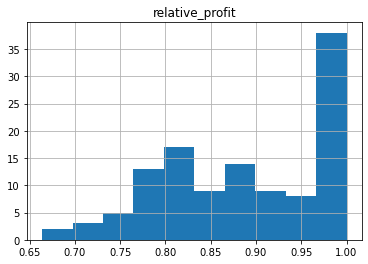

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# посмотрим на распределение "relative_profit"
df[["relative_profit"]].hist()

некоторое количество рейсов не дотягивает до 80%, хотя даже 85% уже маловато  

In [305]:
df_unprofitable=df[df.relative_profit<0.85]
df_unprofitable.shape[0]

44

наверное, 44 рейса из 127 отменять мы не будем. Попробуем 80%

In [306]:
df_unprofitable=df[df.relative_profit<0.80]
df_unprofitable.shape[0]

23

In [308]:
df_unprofitable[
    ["relative_profit", "flight_id", "aircraft", 
     "actual_departure", "departure_airport", "arrival_airport", 
     "seat_utilization", "weekday"]
    ].sort_values(by="relative_profit")

,relative_profit,flight_id,aircraft,actual_departure,departure_airport,arrival_airport,seat_utilization,weekday
117,0.663958,136807,SU9,2017-02-23 09:28:00,AAQ,EGO,70,Thursday
116,0.670622,136642,SU9,2017-01-30 09:28:00,AAQ,EGO,65,Monday
58,0.714060,136250,733,2017-02-08 10:06:00,AAQ,SVO,76,Wednesday
57,0.715879,136464,733,2017-01-09 10:07:00,AAQ,SVO,76,Monday
115,0.725954,136844,SU9,2017-02-28 09:26:00,AAQ,EGO,81,Tuesday
56,0.735092,136122,733,2017-01-08 10:08:00,AAQ,SVO,74,Sunday
55,0.738169,136178,733,2017-01-29 10:10:00,AAQ,SVO,76,Sunday
54,0.742819,136360,733,2017-02-05 10:08:00,AAQ,SVO,74,Sunday
53,0.744216,136204,733,2017-02-23 10:06:00,AAQ,SVO,82,Thursday
114,0.760874,136887,SU9,2017-01-20 09:30:00,AAQ,EGO,80,Friday


Получаем 24 самых малоприбыльных с точки зрения ожиданий рейса:

In [309]:
df_unprofitable[
    ["relative_profit", "flight_id"]].sort_values(by="relative_profit")#["flight_id"].to_list()

,relative_profit,flight_id
117,0.663958,136807
116,0.670622,136642
58,0.714060,136250
57,0.715879,136464
115,0.725954,136844
56,0.735092,136122
55,0.738169,136178
54,0.742819,136360
53,0.744216,136204
114,0.760874,136887


In [310]:
df_unprofitable[
    ["relative_profit", "flight_id"]].sort_values(by="relative_profit")["flight_id"].to_list()

[136807,
 136642,
 136250,
 136464,
 136844,
 136122,
 136178,
 136360,
 136204,
 136887,
 136383,
 136202,
 136486,
 136922,
 136620,
 136185,
 136282,
 136345,
 136485,
 136823,
 136366,
 136320,
 136888]

кстати, на период выпадают праздники Отсортируем по дате

In [311]:
df_unprofitable[
    ["relative_profit", "flight_id", "aircraft", 
     "actual_departure", "departure_airport", "arrival_airport", 
     "seat_utilization", "weekday"]
    ].sort_values(by="actual_departure")

,relative_profit,flight_id,aircraft,actual_departure,departure_airport,arrival_airport,seat_utilization,weekday
51,0.770742,136202,733,2017-01-05 10:07:00,AAQ,SVO,76,Thursday
56,0.735092,136122,733,2017-01-08 10:08:00,AAQ,SVO,74,Sunday
57,0.715879,136464,733,2017-01-09 10:07:00,AAQ,SVO,76,Monday
45,0.792198,136366,733,2017-01-11 10:08:00,AAQ,SVO,79,Wednesday
49,0.783968,136185,733,2017-01-14 10:06:00,AAQ,SVO,80,Saturday
48,0.785230,136282,733,2017-01-16 10:07:00,AAQ,SVO,81,Monday
114,0.760874,136887,SU9,2017-01-20 09:30:00,AAQ,EGO,80,Friday
47,0.785512,136345,733,2017-01-24 13:32:00,AAQ,SVO,83,Tuesday
52,0.769345,136383,733,2017-01-25 10:09:00,AAQ,SVO,81,Wednesday
46,0.786909,136485,733,2017-01-27 10:07:00,AAQ,SVO,81,Friday


Новый год для боинга (0.799718)
23 февраля в обоих направлениях(0.744216 боинг и 0.727080 для SU9)


Проанализируем по столбцу profit (абсолютная прибыль):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb99be06bb0>]],
      dtype=object)

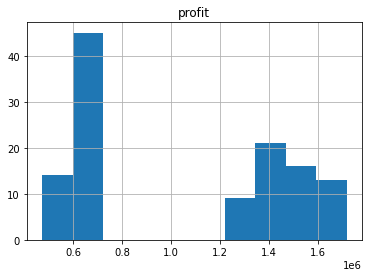

In [312]:
df[["profit"]].hist()

теперь подробнее:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb99bee0df0>]],
      dtype=object)

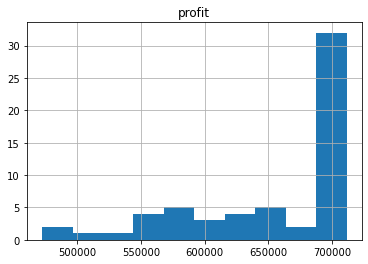

In [313]:
df[df.aircraft=="SU9"][["profit"]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb99bf21220>]],
      dtype=object)

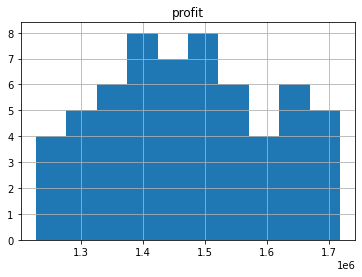

In [314]:
df[df.aircraft=="733"][["profit"]].hist()

решим задачу самым простым способом, выявим самые малоприбыльные рейсы с точки зрения абсолютной прибыли:

In [315]:
# сортируем по стлобцу "profit" и возьмем 25 верхних строк
df.sort_values(by="profit").head(25)

,flight_id,flight_no,aircraft,actual_departure,departure_airport,arrival_airport,seat_capacity,seats_taken,seat_utilization,revenue,duration,fuel_consumption,fuel_consumed,price,fuel_costs,profit,weekday,profit_max,relative_profit
117,136807,PG0480,SU9,2017-02-23 09:28:00,AAQ,EGO,97,68,70,531000,0.83,1.7,1.416667,41435,58699.58,472300.0,Thursday,711340.0,0.663958
116,136642,PG0480,SU9,2017-01-30 09:28:00,AAQ,EGO,97,64,65,531000,0.82,1.7,1.388333,38867,53960.35,477040.0,Monday,711340.0,0.670622
115,136844,PG0480,SU9,2017-02-28 09:26:00,AAQ,EGO,97,79,81,575100,0.83,1.7,1.416667,41435,58699.58,516400.0,Tuesday,711340.0,0.725954
114,136887,PG0480,SU9,2017-01-20 09:30:00,AAQ,EGO,97,78,80,595200,0.82,1.7,1.388333,38867,53960.35,541240.0,Friday,711340.0,0.760874
113,136922,PG0480,SU9,2017-02-11 09:27:00,AAQ,EGO,97,76,78,607800,0.83,1.7,1.416667,41435,58699.58,549100.0,Saturday,711340.0,0.771923
112,136620,PG0480,SU9,2017-02-17 09:30:00,AAQ,EGO,97,79,81,613500,0.82,1.7,1.388333,41435,57525.59,555974.0,Friday,711340.0,0.781587
111,136823,PG0480,SU9,2017-02-05 09:27:00,AAQ,EGO,97,78,80,620400,0.85,1.7,1.445000,41435,59873.57,560526.0,Sunday,711340.0,0.787986
110,136888,PG0480,SU9,2017-02-14 09:29:00,AAQ,EGO,97,79,81,626100,0.83,1.7,1.416667,41435,58699.58,567400.0,Tuesday,711340.0,0.797650
109,136937,PG0480,SU9,2017-01-03 09:29:00,AAQ,EGO,97,81,83,626100,0.83,1.7,1.416667,38867,55061.58,571038.0,Tuesday,711340.0,0.802764
108,136678,PG0480,SU9,2017-01-28 09:27:00,AAQ,EGO,97,80,82,631200,0.83,1.7,1.416667,38867,55061.58,576138.0,Saturday,711340.0,0.809933


получаем одно направление которое предлагается отменить согласно данной модели (хотя это видно было уже из гграфика)
разделим все-таки по направлениям:


In [316]:
# сортируем по стлобцу "profit" и возьмем 10 верхних строк для 733
df[df.aircraft=="733"].sort_values(by="profit").head(15)

,flight_id,flight_no,aircraft,actual_departure,departure_airport,arrival_airport,seat_capacity,seats_taken,seat_utilization,revenue,duration,fuel_consumption,fuel_consumed,price,fuel_costs,profit,weekday,profit_max,relative_profit
58,136250,PG0252,733,2017-02-08 10:06:00,AAQ,SVO,130,99,76,1407800,1.68,2.6,4.376667,41435,181347.18,1226453.0,Wednesday,1717576.0,0.714060
57,136464,PG0252,733,2017-01-09 10:07:00,AAQ,SVO,130,100,76,1398000,1.67,2.6,4.333333,38867,168423.67,1229576.0,Monday,1717576.0,0.715879
56,136122,PG0252,733,2017-01-08 10:08:00,AAQ,SVO,130,97,74,1431000,1.67,2.6,4.333333,38867,168423.67,1262576.0,Sunday,1717576.0,0.735092
55,136178,PG0252,733,2017-01-29 10:10:00,AAQ,SVO,130,99,76,1434600,1.65,2.6,4.290000,38867,166739.43,1267861.0,Sunday,1717576.0,0.738169
54,136360,PG0252,733,2017-02-05 10:08:00,AAQ,SVO,130,97,74,1455400,1.67,2.6,4.333333,41435,179551.67,1275848.0,Sunday,1717576.0,0.742819
53,136204,PG0252,733,2017-02-23 10:06:00,AAQ,SVO,130,107,82,1457800,1.67,2.6,4.333333,41435,179551.67,1278248.0,Thursday,1717576.0,0.744216
52,136383,PG0252,733,2017-01-25 10:09:00,AAQ,SVO,130,106,81,1493200,1.70,2.6,4.420000,38867,171792.14,1321408.0,Wednesday,1717576.0,0.769345
51,136202,PG0252,733,2017-01-05 10:07:00,AAQ,SVO,130,100,76,1495600,1.70,2.6,4.420000,38867,171792.14,1323808.0,Thursday,1717576.0,0.770742
50,136486,PG0252,733,2017-02-02 10:07:00,AAQ,SVO,130,107,82,1505400,1.68,2.6,4.376667,41435,181347.18,1324053.0,Thursday,1717576.0,0.770885
49,136185,PG0252,733,2017-01-14 10:06:00,AAQ,SVO,130,104,80,1520000,1.72,2.6,4.463333,38867,173476.38,1346524.0,Saturday,1717576.0,0.783968


In [317]:
# рейсы 733
df_733_unprofit=df[
    df.aircraft=="733"].sort_values(by="profit").head(15)[["flight_id", "profit"]]
df_733_unprofit


,flight_id,profit
58,136250,1226453.0
57,136464,1229576.0
56,136122,1262576.0
55,136178,1267861.0
54,136360,1275848.0
53,136204,1278248.0
52,136383,1321408.0
51,136202,1323808.0
50,136486,1324053.0
49,136185,1346524.0


In [318]:
# рейсы SU9
df_SU9_unprofit=df[
    df.aircraft=="SU9"].sort_values(by="profit").head(15)[["flight_id", "profit"]]
df_733_unprofit

,flight_id,profit
58,136250,1226453.0
57,136464,1229576.0
56,136122,1262576.0
55,136178,1267861.0
54,136360,1275848.0
53,136204,1278248.0
52,136383,1321408.0
51,136202,1323808.0
50,136486,1324053.0
49,136185,1346524.0


теперь объединим оба подхода

In [319]:
# неприбыльные рейсы по абсолютной прибыли
ls_733=df_733_unprofit["flight_id"].to_list()
ls_SU9=df_SU9_unprofit["flight_id"].to_list()
set(ls_SU9) , set(ls_733)


({136609,
  136620,
  136642,
  136645,
  136666,
  136678,
  136767,
  136807,
  136823,
  136844,
  136887,
  136888,
  136922,
  136936,
  136937},
 {136122,
  136178,
  136185,
  136202,
  136204,
  136250,
  136282,
  136320,
  136345,
  136360,
  136366,
  136383,
  136464,
  136485,
  136486})

In [320]:
set_all=set(ls_SU9).union(set(ls_733))
set_all

{136122,
 136178,
 136185,
 136202,
 136204,
 136250,
 136282,
 136320,
 136345,
 136360,
 136366,
 136383,
 136464,
 136485,
 136486,
 136609,
 136620,
 136642,
 136645,
 136666,
 136678,
 136767,
 136807,
 136823,
 136844,
 136887,
 136888,
 136922,
 136936,
 136937}

In [321]:
# неприбыльные рейсы по относительной прибыли
set_all1 =set(df_unprofitable["flight_id"].to_list())
set_all1

{136122,
 136178,
 136185,
 136202,
 136204,
 136250,
 136282,
 136320,
 136345,
 136360,
 136366,
 136383,
 136464,
 136485,
 136486,
 136620,
 136642,
 136807,
 136823,
 136844,
 136887,
 136888,
 136922}

In [322]:
set_all.intersection(set_all1)

{136122,
 136178,
 136185,
 136202,
 136204,
 136250,
 136282,
 136320,
 136345,
 136360,
 136366,
 136383,
 136464,
 136485,
 136486,
 136620,
 136642,
 136807,
 136823,
 136844,
 136887,
 136888,
 136922}

## НОМЕРА МАЛОПРИБЫЛЬНЫХ РЕЙСОВ:

 136122,
 136178,
 136185,
 136202,
 136204,
 136250,
 136282,
 136320,
 136345,
 136360,
 136366,
 136383,
 136464,
 136485,
 136486,
 136620,
 136642,
 136807,
 136823,
 136844,
 136887,
 136888,
 136922

### ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ
(просто интересно)
если рейсы уже состоялись,  то их уже не отменишь, учитывая, что идентификатор полета уникальный
но можно попробовать найти закономерности, какую-то зависимость прибыли от дня недели, например
ясно, что SU9 прибыли приносит меньше, но, возможно из человеколюбия все рейсы на Белгород отменять не будут
А у Боинга есть вероятность при недоборе пассажиров принести убытки (ведь в данной таблице мы не учитываем огромные расходы на лизинг и техобслуживание, а также зарплаты персонала)

In [194]:
# посмотрим самые малоприбыльные рейсы в разрезе самолет/день недели:
df_unprofitable.groupby("aircraft")["weekday"].value_counts()

aircraft  weekday  
733       Sunday       5
          Thursday     3
          Wednesday    3
          Monday       2
          Friday       1
          Saturday     1
          Tuesday      1
SU9       Friday       2
          Tuesday      2
          Monday       1
          Saturday     1
          Sunday       1
          Thursday     1
Name: weekday, dtype: int64

Кажется, для 733 восересенье не самый прибыльный день. 
А как вообще с прибылью по восресеньям?

In [195]:
df[df["weekday"]=="Sunday"][["actual_departure", "relative_profit", "weekday", "aircraft"]]

,actual_departure,relative_profit,weekday,aircraft
56,2017-01-08 10:08:00,0.735092,Sunday,733
55,2017-01-29 10:10:00,0.737188,Sunday,733
54,2017-02-05 10:08:00,0.742819,Sunday,733
111,2017-02-05 09:27:00,0.790862,Sunday,SU9
44,2017-02-19 10:05:00,0.794636,Sunday,733
43,2017-01-01 10:09:00,0.799718,Sunday,733
42,2017-02-26 10:13:00,0.801041,Sunday,733
105,2017-01-08 09:28:00,0.822595,Sunday,SU9
30,2017-02-12 10:12:00,0.843659,Sunday,733
29,2017-01-15 10:05:00,0.843733,Sunday,733


в основном, меньше 90%

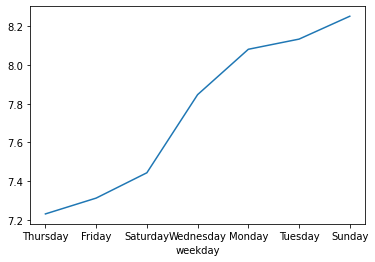

In [196]:
# посмотрим на суммарную относительную прибыль по дням сначала для SuperJeta:
df[df.aircraft=="SU9"].groupby(["weekday"])["relative_profit"].sum().sort_values().plot()

ого! рейсы SU9 по воскресеньям не отменяем...

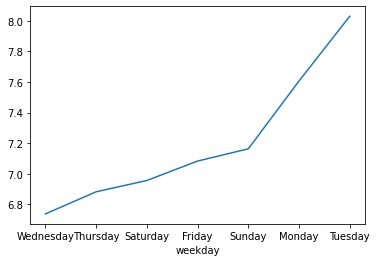

In [160]:
# теперь по 733:
df[df.aircraft=="733"].groupby(["weekday"])["relative_profit"].sum().sort_values().plot()

Также не отменяем 733 по вторникам.
Подозрения с воскресного дня снимаются. 
Четверг-пятница для "SU9" и Среда-четверг для Боинга
Выведем  данные за все подозрительные среды, четверги и пятницы:

In [197]:
df.query('(weekday in ["Thursday", "Friday"] and aircraft in["SU9"]) or (weekday in ["Thursday", "Wednesday"] and aircraft in["733"])')[
         ["flight_id", "actual_departure", "relative_profit", "weekday", "aircraft"]]

,flight_id,actual_departure,relative_profit,weekday,aircraft
117,136807,2017-02-23 09:28:00,0.664988,Thursday,SU9
58,136250,2017-02-08 10:06:00,0.715105,Wednesday,733
53,136204,2017-02-23 10:06:00,0.744216,Thursday,733
114,136887,2017-01-20 09:30:00,0.760503,Friday,SU9
52,136383,2017-01-25 10:09:00,0.771306,Wednesday,733
51,136486,2017-02-02 10:07:00,0.771930,Thursday,733
50,136202,2017-01-05 10:07:00,0.772703,Thursday,733
112,136620,2017-02-17 09:30:00,0.781147,Friday,SU9
45,136366,2017-01-11 10:08:00,0.791217,Wednesday,733
39,136165,2017-02-22 10:11:00,0.808144,Wednesday,733
